<a href="https://colab.research.google.com/github/JoannaLe/cancer-detection/blob/master/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout

import numpy as np
import os
import matplotlib.pyplot as plt

GOOGLE_APPLICATION_CREDENTIALS = '/content/cancer-detection-fa915e095a9d.json'

In [3]:
# Open Google Cloud Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
print(os.getcwd())
os.chdir("/content")
!ls

/content
gdrive	sample_data


In [24]:
# get X training data
x_path = "gdrive/My Drive/cancer-detection/patch-zoom-6"
print(os.listdir(x_path))
X_train = []

for patch_file in os.listdir(x_path):
  patch_path = os.path.join(x_path, patch_file)
  patch_arr = np.load(patch_path)
  X_train.append(patch_arr)
  
print(type(X_train[0]))
print(len(X_train))
X_train = np.array(X_train)

# get Y training data
y_path = "gdrive/My Drive/cancer-detection/mask-zoom-6"
print(os.listdir(y_path))
y_train = []

for mask_file in os.listdir(y_path):
  mask_path = os.path.join(y_path, mask_file)
  mask = open(mask_path, 'r').read()
  y_train.append(int(mask))
  
print(type(y_train[0]))
print(y_train)
print(len(y_train))
y_train = np.array(y_train)


# get test data
levels = ['6']
for level in levels:
  x_path = "gdrive/My Drive/cancer-detection/patch-val" + level + "/016"
  X_test = []

  for patch_file in os.listdir(x_path):
    patch_path = os.path.join(x_path, patch_file)
    patch_arr = np.load(patch_path)
    X_test.append(patch_arr)
  X_test = np.array(X_test)

  y_test = []
  y_path = "gdrive/My Drive/cancer-detection/mask-val/016"
  for mask_file in os.listdir(y_path):
    mask_path = os.path.join(y_path, mask_file)
    mask = open(mask_path, 'r').read()
    y_test.append(int(mask))
  y_test = np.array(y_test)

['005-patch-0.npy', '005-patch-1.npy', '005-patch-2.npy', '005-patch-3.npy', '005-patch-4.npy', '005-patch-5.npy', '005-patch-6.npy', '005-patch-7.npy', '005-patch-8.npy', '005-patch-9.npy', '005-patch-10.npy', '005-patch-11.npy', '005-patch-12.npy', '005-patch-13.npy', '005-patch-14.npy', '005-patch-15.npy', '005-patch-16.npy', '005-patch-17.npy', '005-patch-18.npy', '005-patch-19.npy', '005-patch-20.npy', '005-patch-21.npy', '005-patch-22.npy', '005-patch-23.npy', '005-patch-24.npy', '005-patch-25.npy', '005-patch-26.npy', '005-patch-28.npy', '005-patch-27.npy', '005-patch-29.npy', '005-patch-30.npy', '005-patch-31.npy', '005-patch-32.npy', '005-patch-33.npy', '005-patch-34.npy', '005-patch-35.npy', '005-patch-36.npy', '005-patch-38.npy', '005-patch-37.npy', '005-patch-39.npy', '005-patch-40.npy', '005-patch-41.npy', '005-patch-42.npy', '005-patch-43.npy', '005-patch-44.npy', '005-patch-45.npy', '005-patch-46.npy', '005-patch-47.npy', '005-patch-48.npy', '005-patch-49.npy', '005-patc

In [26]:
# test 1 model at zoom level 6
img_shape = (224,224,3)
EPOCHS = 20
BATCH_SIZE = 16

model1 = ResNet50(include_top=False, weights='imagenet', input_shape=img_shape)
x = model1.output
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(input=model1.input, output=x)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [27]:
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/20
506/506 [==============================] - 29s 57ms/step - loss: 0.1119 - acc: 0.9881
Epoch 2/20
506/506 [==============================] - 7s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 3/20
506/506 [==============================] - 7s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 4/20
506/506 [==============================] - 7s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 5/20
506/506 [==============================] - 7s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 6/20
506/506 [==============================] - 8s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 7/20
506/506 [==============================] - 8s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 8/20
506/506 [==============================] - 8s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 9/20
506/506 [==============================] - 8s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 10/20
506/506 [==============================] - 8s 15ms/step - loss: 0.0956 - acc: 0.9941
Epoch 11/20
506/506 [=================

434


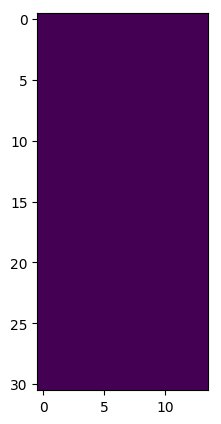

In [29]:
pred = model.predict(x=X_val, batch_size = 32)
print(len(pred))

num_patch_x = 13 # download from file 
num_patch_y = 30
patch_dim = 224

pred = model.predict(x=X_val, batch_size = 32)
matrix = np.zeros((num_patch_y + 1, num_patch_x + 1), dtype=int)

for count, i in enumerate(pred): 
  if i == 1:
    print("cancer")
  matrix[count//(num_patch_x+1)][count%(num_patch_x+1)] = i # impt 

plt.figure(figsize=(5,5), dpi=100)
plt.imshow(matrix)

In [0]:
img_shape = (224,224,3)
EPOCHS = 10
BATCH_SIZE = 64

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=img_shape))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3154176)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                201867328 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 201,869,185
Trainable params: 201,869,185
Non-trainable params: 0
_________________________________________________________________


In [0]:
print(X_train.shape)

model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

(72, 224, 224, 3)
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
72/72 [==============================] - 12s 170ms/step - loss: 3.9834 - acc: 0.6528
Epoch 2/10
72/72 [==============================] - 2s 30ms/step - loss: 0.4477 - acc: 0.9722
Epoch 3/10
72/72 [==============================] - 2s 30ms/step - loss: 0.4477 - acc: 0.9722
Epoch 4/10
72/72 [==============================] - 2s 31ms/step - loss: 0.4477 - acc: 0.9722
Epoch 5/10
72/72 [==============================] - 2s 31ms/step - loss: 0.4477 - acc: 0.9722
Epoch 6/10
72/72 [==============================] - 2s 31ms/step - loss: 0.4477 - acc: 0.9722
Epoch 7/10
72/72 [==============================] - 2s 31ms/step - loss: 0.4477 - acc: 0.9722
Epoch 8/10
72/72 [==============================] - 2s 31ms/step - loss: 0.4477 - acc: 0.9722
Epoch 9/10
72/72 [==============================] - 2s 31ms/step - loss: 0.4477 - acc: 0.9722
Epoch 10/10
72/72 [==============================] - 2s 31ms/step - loss: 0.4477 - acc